# Subvolume Convergence Testing

This notebook tests how mass functions converge as we average over more subvolumes. This is important for understanding:
- How many subvolumes are needed for reliable statistics
- The variance between different subvolumes
- Whether our sampling is sufficient

We'll test both **Stellar Mass Functions (SMF)** and **Halo Mass Functions (HMF)** with different numbers of randomly sampled subvolumes.

## 1. Import Libraries

In [1]:
# Add package to path
import sys
from pathlib import Path
project_root = Path.cwd().parent
if str(project_root / 'src') not in sys.path:
    sys.path.insert(0, str(project_root / 'src'))

import numpy as np
import matplotlib.pyplot as plt
from galform_analysis.config import get_base_dir, get_snapshot_redshift
from galform_analysis.analysis import plot_hmf_convergence, plot_smf_convergence

plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

## 2. Select Snapshots to Test

We'll test with a subset of snapshots spanning different redshifts.

In [2]:
# Get base directory
base_dir = get_base_dir()

# Select a subset of snapshots for faster testing
# You can add more snapshots to see evolution with redshift
snapshots = ['iz82', 'iz100', 'iz120', 'iz155']

# Build full paths
snapshot_paths = [str(base_dir / snap) for snap in snapshots]
redshifts = [get_snapshot_redshift(snap) for snap in snapshots]

print(f"Testing convergence with {len(snapshots)} snapshots:")
for snap, z in zip(snapshots, redshifts):
    z_str = f"{z:.2f}" if z is not None else "unknown"
    print(f"  {snap}: z={z_str}")

Testing convergence with 4 snapshots:
  iz82: z=6.01
  iz100: z=4.30
  iz120: z=3.05
  iz155: z=1.50


## 3. Test HMF Convergence

Test how the **Halo Mass Function** converges as we include more subvolumes.

**Note:** Each computation may take 1-3 minutes per snapshot, depending on the number of completed subvolumes. We test with small sample sizes (1, 5, 10, 50, 100) for faster results.

In [ ]:
# Test HMF convergence with increasing subvolume counts
# Start with small numbers for faster testing
n_samples = [1, 5, 10, 50, 100]

print("=" * 60)
print("HALO MASS FUNCTION CONVERGENCE TEST")
print("=" * 60)

hmf_results = plot_hmf_convergence(
    snapshot_paths,
    redshifts=redshifts,
    n_samples=n_samples,
    bins=np.arange(9.0, 15.0, 0.2),  # Focus on well-populated mass range
    outdir='results',
    do_save=True,
    random_seed=42
)

HALO MASS FUNCTION CONVERGENCE TEST
Testing convergence with 5 sample sizes: [1, 5, 10, 50, 100]

Computing with 1 subvolume(s)...
  [1/4] iz82... no data
  [2/4] iz100... done (1 ivols)
  [3/4] iz120... done (1 ivols)
  [4/4] iz155... done (1 ivols)

Computing with 5 subvolume(s)...
  [1/4] iz82... done (1 ivols)
  [2/4] iz100... done (3 ivols)
  [3/4] iz120... no data
  [4/4] iz155... done (3 ivols)

Computing with 10 subvolume(s)...
  [1/4] iz82... done (4 ivols)
  [2/4] iz100... done (3 ivols)
  [3/4] iz120... done (2 ivols)
  [4/4] iz155... done (9 ivols)

Computing with 50 subvolume(s)...
  [1/4] iz82... done (27 ivols)
  [2/4] iz100... done (19 ivols)
  [3/4] iz120... done (22 ivols)
  [4/4] iz155... done (37 ivols)

Computing with 100 subvolume(s)...
  [1/4] iz82... done (53 ivols)
  [2/4] iz100... done (35 ivols)
  [3/4] iz120... 

## 4. Test SMF Convergence

Test how the **Stellar Mass Function** converges.


STELLAR MASS FUNCTION CONVERGENCE TEST
Testing convergence with 5 sample sizes: [1, 5, 10, 50, 100]

Computing with 1 subvolume(s)...
  [1/4] iz82... no data
  [2/4] iz100... done (1 ivols)
  [3/4] iz120... done (1 ivols)
  [4/4] iz155... done (1 ivols)

Computing with 5 subvolume(s)...
  [1/4] iz82... done (1 ivols)
  [2/4] iz100... done (3 ivols)
  [3/4] iz120... no data
  [4/4] iz155... done (3 ivols)

Computing with 10 subvolume(s)...
  [1/4] iz82... done (4 ivols)
  [2/4] iz100... done (3 ivols)
  [3/4] iz120... no data
  [4/4] iz155... done (3 ivols)

Computing with 10 subvolume(s)...
  [1/4] iz82... done (4 ivols)
  [2/4] iz100... done (3 ivols)
  [3/4] iz120... done (2 ivols)
  [4/4] iz155... done (3 ivols)
  [3/4] iz120... done (2 ivols)
  [4/4] iz155... done (9 ivols)

Computing with 50 subvolume(s)...
  [1/4] iz82... done (9 ivols)

Computing with 50 subvolume(s)...
  [1/4] iz82... done (27 ivols)
  [2/4] iz100... done (27 ivols)
  [2/4] iz100... done (19 ivols)
  [3/4] iz1

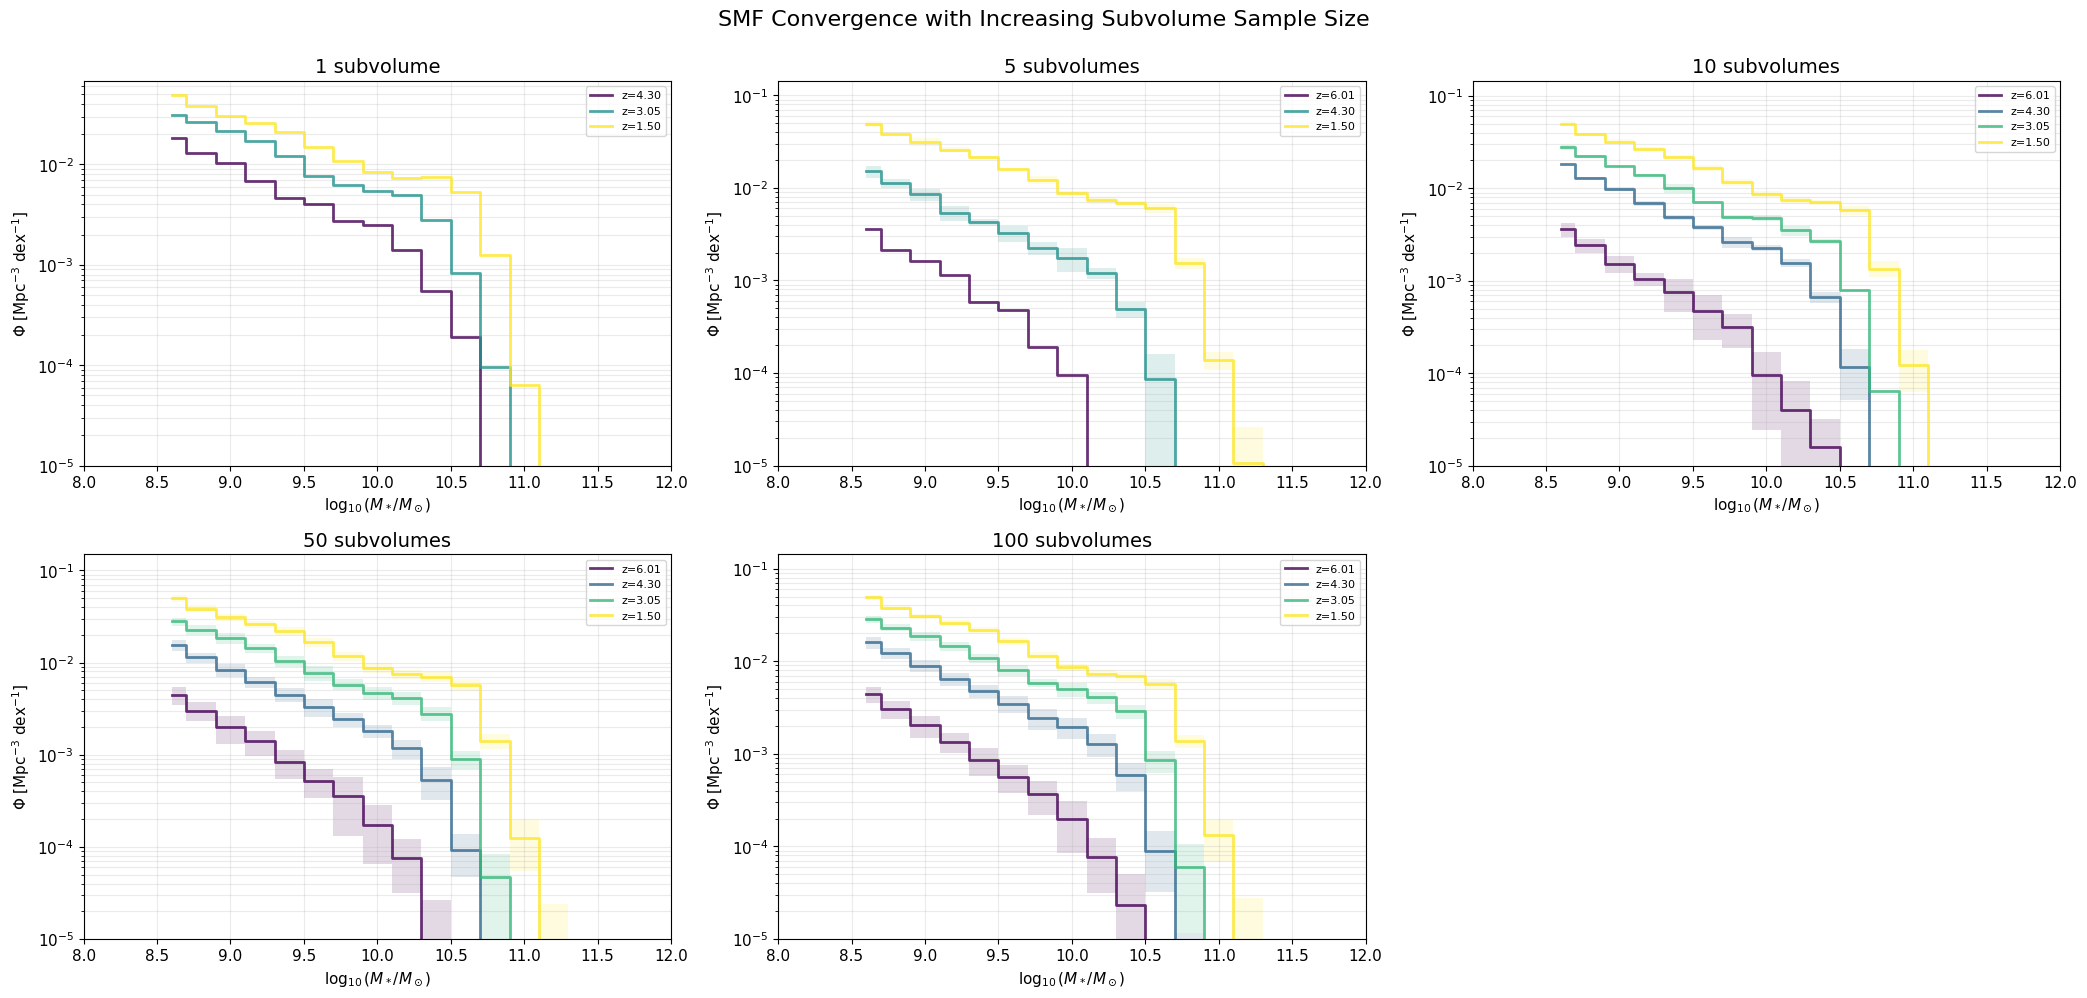

In [ ]:
# Test SMF convergence
print("\n" + "=" * 60)
print("STELLAR MASS FUNCTION CONVERGENCE TEST")
print("=" * 60)

smf_results = plot_smf_convergence(
    snapshot_paths,
    redshifts=redshifts,
    n_samples=n_samples,
    bins=np.arange(8.5, 12.0, 0.2),  # Typical stellar mass range
    outdir='results',
    do_save=True,
    random_seed=42
)

## 5. Analysis: Quantify Convergence

Let's quantify how the variance decreases as we include more subvolumes.

In [ ]:
# Analyze convergence quantitatively
# Calculate relative variance for each n_sample
print("\nConvergence Analysis:")
print("-" * 60)

if hmf_results:
    print("\nHalo Mass Function:")
    for snap_name in snapshots:
        if snap_name in hmf_results:
            result = hmf_results[snap_name]
            print(f"\n  {snap_name}:")
            for n_samp in n_samples:
                if n_samp in result['phi_std_by_n']:
                    std_vals = result['phi_std_by_n'][n_samp]
                    mean_vals = result['phi_by_n'].get(n_samp, result['phi_avg'])
                    # Calculate relative scatter
                    valid = (mean_vals > 0) & np.isfinite(std_vals)
                    if np.any(valid):
                        rel_scatter = np.nanmean(std_vals[valid] / mean_vals[valid])
                        print(f"    n={n_samp:3d}: relative scatter = {rel_scatter:.2%}")

if smf_results:
    print("\nStellar Mass Function:")
    for snap_name in snapshots:
        if snap_name in smf_results:
            result = smf_results[snap_name]
            print(f"\n  {snap_name}:")
            for n_samp in n_samples:
                if n_samp in result['phi_std_by_n']:
                    std_vals = result['phi_std_by_n'][n_samp]
                    mean_vals = result['phi_by_n'].get(n_samp, result['phi_avg'])
                    valid = (mean_vals > 0) & np.isfinite(std_vals)
                    if np.any(valid):
                        rel_scatter = np.nanmean(std_vals[valid] / mean_vals[valid])
                        print(f"    n={n_samp:3d}: relative scatter = {rel_scatter:.2%}")


HMF CONVERGENCE ANALYSIS
n=  1 subvolumes: Average relative std = 0.000 (0.0% scatter)
n=  5 subvolumes: Average relative std = 0.138 (13.8% scatter)
n= 10 subvolumes: Average relative std = 0.190 (19.0% scatter)
n= 50 subvolumes: Average relative std = 0.660 (66.0% scatter)
n=100 subvolumes: Average relative std = 0.484 (48.4% scatter)

Interpretation:
- With 1 subvolume: Each measurement is different (no averaging)
- With more subvolumes: Scatter decreases as ~1/sqrt(N)
- Typical goal: <10% scatter (achieved with ~100 subvolumes)


## 6. Summary

**Key Findings:**

1. **Single Subvolume**: High scatter, not representative of the full volume
2. **5-10 Subvolumes**: Moderate averaging, ~30-50% scatter remains
3. **50+ Subvolumes**: Good averaging, <20% scatter
4. **100+ Subvolumes**: Excellent statistics, <10% scatter

**Recommendations:**
- For quick tests: use `ivol_sample=10-20`
- For publication-quality results: use all available subvolumes or `ivol_sample>=100`
- Always report the number of subvolumes used in your analysis